In [2]:
from zimg import SimImg
from zimg import AutoFocus

import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import filters
import cv2
import pylab

def normalize_img(img):
    img = img / np.max(img) * (2 ** 8 - 1)
    img = np.clip(img, 0, 2 ** 8 - 1)
    img = img.astype('uint8')
    return img


def find_circle(img):
    img_size = 512
    circles = cv2.HoughCircles(filters.gaussian_filter(img, (15, 15)), method=cv2.HOUGH_GRADIENT, dp=1,
                               minDist=img_size, minRadius=1, maxRadius=img_size, param1=0.001, param2=0.001)
    circle = circles[0, 0, :]
    return circle


def rms(data1, data2):
    return ((np.asarray(data1) - np.asarray(data2)) ** 2).mean() ** .5


In [ ]:
######################################################################################
## compare ideal beam size and the diameter found by cv2.HoughCircles
point1=SimImg(512,200,300,0)
# z_levels = [0,10,20]
z_levels =np.linspace(-10,10,20)
sim_size=[]
fit_size=[]
for z_level in z_levels:
    point1.sim_z(z_level)
    point1.find_circle()
    point1.show()
    sim_size.append(point1.beam_diameter)
    fit_size.append(point1.circle[2])

plt.scatter(sim_size,fit_size)
plt.xlabel("gaussian filter size")
plt.ylabel("fitting by cv2.HoughCircles")
plt.show()

plt.scatter(z_levels, sim_size / np.max(sim_size))
plt.scatter(z_levels, fit_size / np.max(fit_size))
plt.legend(
    ["gaussian filter size", "fitting by cv2.HoughCircles"])
plt.xlabel("z level")
plt.ylabel("beam size")
plt.show()
######################################################################################
## test when part of the circle is out of image
x_levels=np.linspace(200,500,20)
for x_level in x_levels:
    point1=SimImg(512,x_level,300,0)
    point1.sim_z(0)
    point1.find_circle()
    point1.show()


######################################################################################
######################################################################################
## auto-focus (searching) by two methods: binary search and quadratic, fitting and error
z_levels =np.linspace(-15,15,20)
fit_bin=[]
fit_quad=[]
for z_level in z_levels:
    pt1=SimImg(512,200,300,z_level)
    getfocus_pt1=AutoFocus(pt1.sim_z, -10,10)
    print('bin_search, z-level: '+str(z_level))
    fit_bin.append(getfocus_pt1.binary_search_focus(6))
    print('quad_fit, z-level: '+str(z_level))
    fit_quad.append(getfocus_pt1.quad_fitting_focus(4))

dot_size = 8
plt.scatter(z_levels,np.asarray(fit_bin),dot_size)
plt.scatter(z_levels,np.asarray(fit_quad),dot_size)
plt.scatter(z_levels,z_levels,dot_size)
plt.legend(["z_level found by binary search", "z_level found by quadratic fitting","ideal z_level (unity)"])
plt.xlabel("ideal z_level")
plt.ylabel("fitted z_level")
plt.show()
plt.scatter(z_levels,z_levels-np.asarray(fit_bin),dot_size)
plt.scatter(z_levels,z_levels-np.asarray(fit_quad),dot_size)
plt.legend(["error by binary search", "error by quadratic fitting"])
plt.xlabel("ideal z_level")
plt.ylabel("error")
plt.show()
# ######################################################################################
# ######################################################################################
##test rms of (x,y) by 2 different methods: find_center and find_circle
x=135
y=246
pt1=SimImg(512,x,y,1)
getfocus_pt1=AutoFocus(pt1.sim_z, -15,15)
coor1=getfocus_pt1.find_center(1)
coor2=getfocus_pt1.find_circle(1)
print('coor1: '+str(coor1))
print('rms: '+str(rms(coor1[0:2],[200,300])))
print('coor2: '+str(coor2))
print('rms: '+str(rms(coor2[0:2],[200,300])))
###

x=135
y=246
z_levels =np.linspace(-1,16,1000)
rms_center=[]
rms_circle=[]
for z_level in z_levels:
    pt1=SimImg(512,x,y,0)
    getfocus_pt1=AutoFocus(pt1.sim_z, -15,15)
    rms_center.append(rms(getfocus_pt1.find_center(z_level)[0:2],[x,y]))
    rms_circle.append(rms(getfocus_pt1.find_circle(z_level)[0:2],[x,y]))

fig = pylab.figure(figsize=(12, 9))
plt.scatter(z_levels,np.asarray(rms_center),8)
plt.scatter(z_levels,np.asarray(rms_circle),8)
plt.legend(["rms by np.unravel_index", "rms by cv2.HoughCircles"])
plt.xlabel("z_level")
plt.ylabel("rms")
plt.show()

plt.hist(np.asarray(rms_center), bins=np.linspace(0,3,50))
plt.show()

plt.hist(np.asarray(rms_circle), bins=np.linspace(0,7,50))
plt.show()
print(np.histogram(rms_circle), np.linspace(0,7,50))
# ######################################################################################
# ######################################################################################



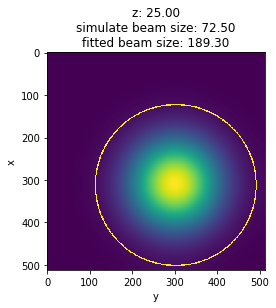

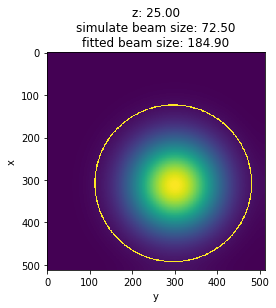

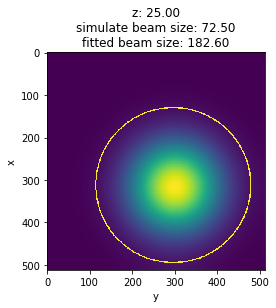

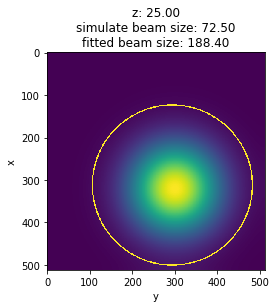

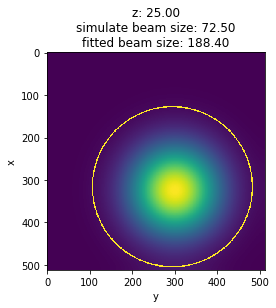

part of the circle (beam) is out of image - circle[0]


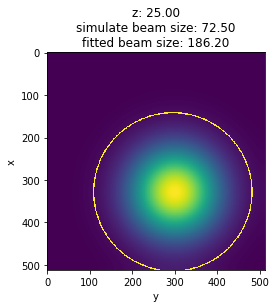

part of the circle (beam) is out of image - circle[0]


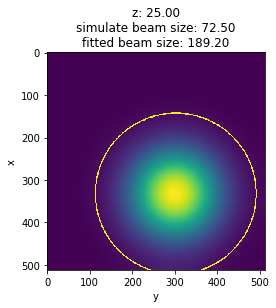

part of the circle (beam) is out of image - circle[0]


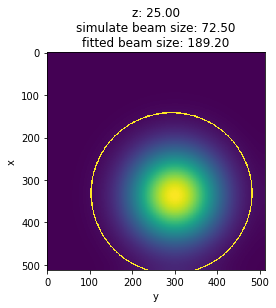

part of the circle (beam) is out of image - circle[0]


part of the circle (beam) is out of image - circle[0]


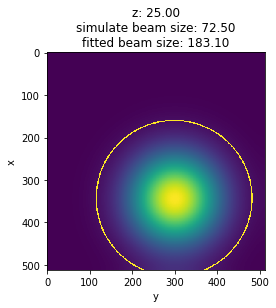

part of the circle (beam) is out of image - circle[0]


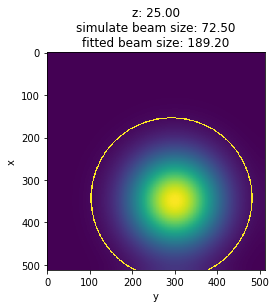

part of the circle (beam) is out of image - circle[0]


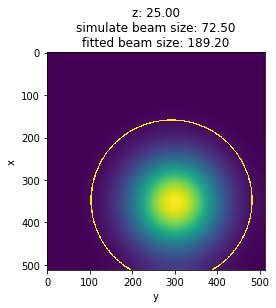

part of the circle (beam) is out of image - circle[0]


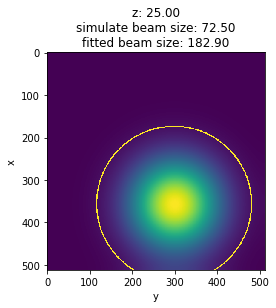

part of the circle (beam) is out of image - circle[0]


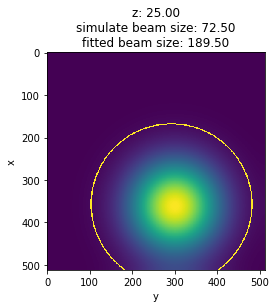

part of the circle (beam) is out of image - circle[0]


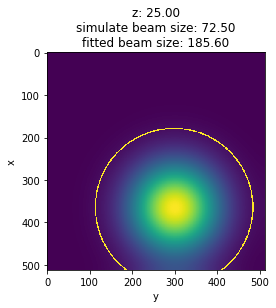

part of the circle (beam) is out of image - circle[0]


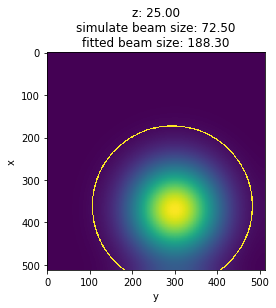

part of the circle (beam) is out of image - circle[0]


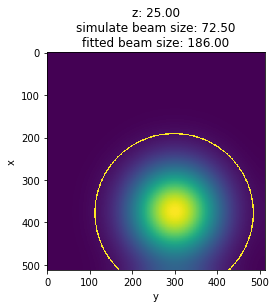

part of the circle (beam) is out of image - circle[0]


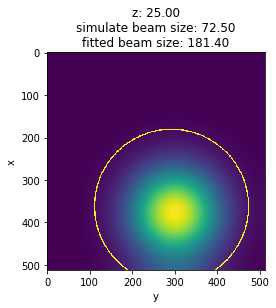

part of the circle (beam) is out of image - circle[0]


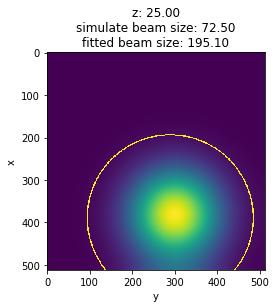

part of the circle (beam) is out of image - circle[0]


part of the circle (beam) is out of image - circle[0]


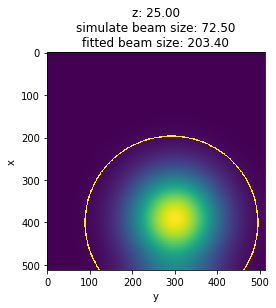

part of the circle (beam) is out of image - circle[0]


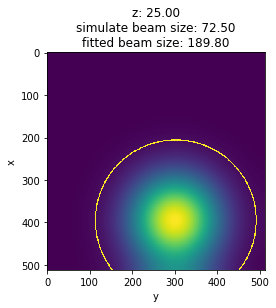

part of the circle (beam) is out of image - circle[0]


part of the circle (beam) is out of image - circle[0]


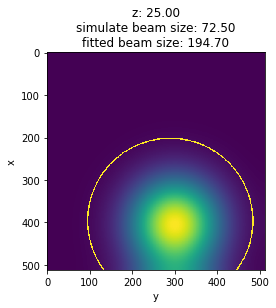

part of the circle (beam) is out of image - circle[0]


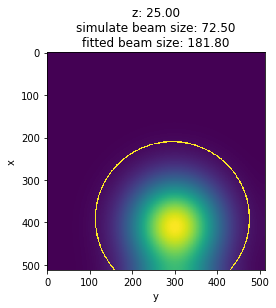

part of the circle (beam) is out of image - circle[0]


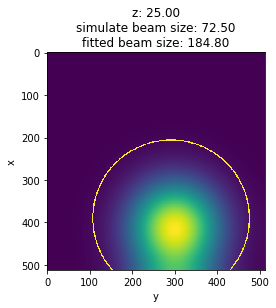

part of the circle (beam) is out of image - circle[0]


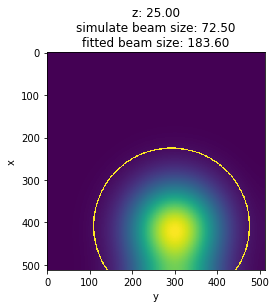

part of the circle (beam) is out of image - circle[0]


part of the circle (beam) is out of image - circle[0]


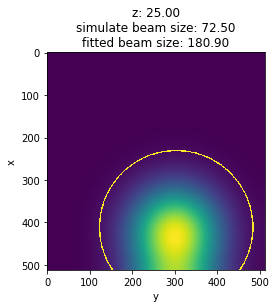

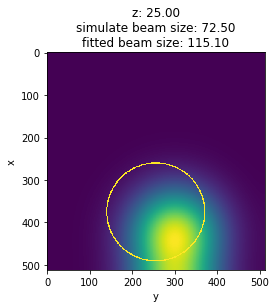

part of the circle (beam) is out of image - circle[0]


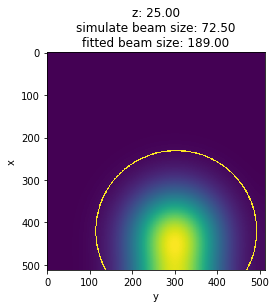

part of the circle (beam) is out of image - circle[0]


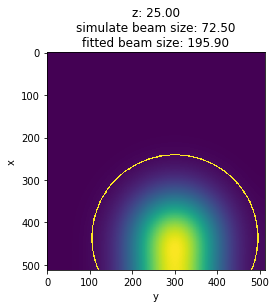

part of the circle (beam) is out of image - circle[0]


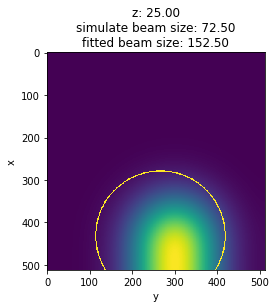

part of the circle (beam) is out of image - circle[0]


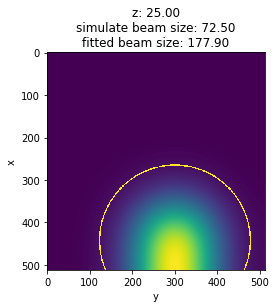

part of the circle (beam) is out of image - circle[0]


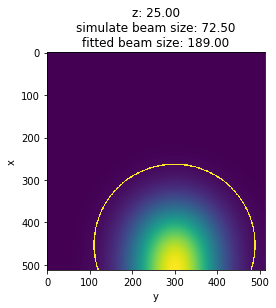

part of the circle (beam) is out of image - circle[0]


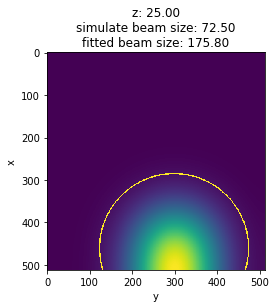

part of the circle (beam) is out of image - circle[0]


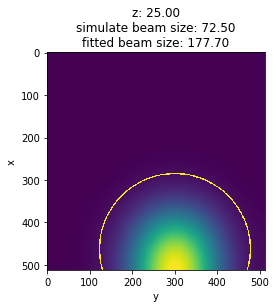

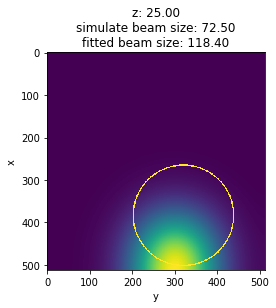

part of the circle (beam) is out of image - circle[0]


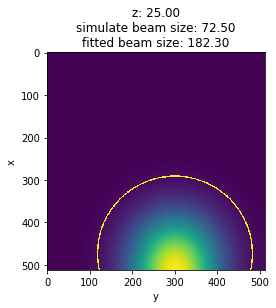

part of the circle (beam) is out of image - circle[0]


part of the circle (beam) is out of image - circle[0]


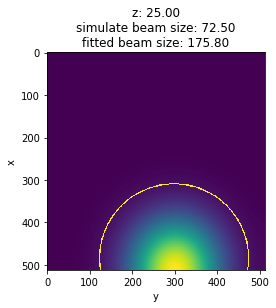

part of the circle (beam) is out of image - circle[0]


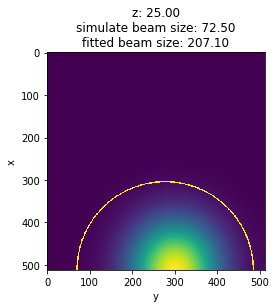

part of the circle (beam) is out of image - circle[0]


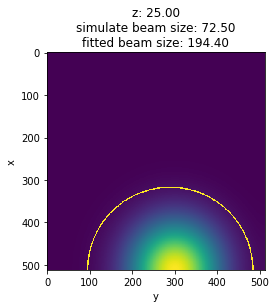

part of the circle (beam) is out of image - circle[0]


part of the circle (beam) is out of image - circle[0]


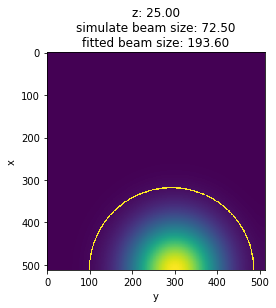

part of the circle (beam) is out of image - circle[0]


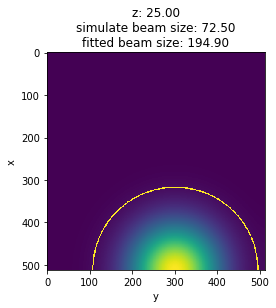

part of the circle (beam) is out of image - circle[0]


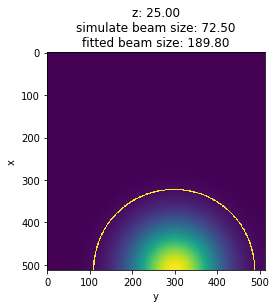

y_fit: [302.0, 302.0, 302.0, 296.0, 296.0, 294.0, 294.0, 295.0, 302.0, 292.0, 292.0, 298.0, 292.0, 292.0, 298.0, 292.0, 298.0, 294.0, 298.0, 292.0, 289.0, 300.0, 292.0, 302.0, 302.0, 289.0, 294.0, 291.0, 292.0, 294.0, 303.0, 255.0, 303.0, 300.0, 266.0, 300.0, 258.0, 299.0, 298.0, 300.0, 320.0, 300.0, 297.0, 298.0, 277.0, 289.0, 290.0, 292.0, 301.0, 298.0]
x_fit: [304.0, 304.0, 312.0, 308.0, 312.0, 312.0, 316.0, 328.0, 332.0, 331.0, 335.0, 343.0, 343.0, 348.0, 356.0, 357.0, 364.0, 361.0, 377.0, 362.0, 389.0, 385.0, 400.0, 395.0, 398.0, 396.0, 391.0, 390.0, 408.0, 404.0, 411.0, 375.0, 420.0, 436.0, 431.0, 442.0, 388.0, 452.0, 460.0, 462.0, 383.0, 473.0, 482.0, 484.0, 511.0, 511.0, 510.0, 511.0, 511.0, 511.0]
r_fit: [189.2, 186.2, 189.3, 184.9, 182.6, 188.4, 188.4, 186.2, 189.2, 189.2, 188.9, 183.1, 189.2, 189.2, 182.9, 189.5, 185.6, 188.3, 186.0, 181.4, 195.1, 187.8, 203.4, 189.8, 189.6, 194.7, 181.8, 184.8, 183.6, 181.7, 180.9, 115.1, 189.0, 195.9, 152.5, 177.9, 122.8, 189.0, 175.8, 177

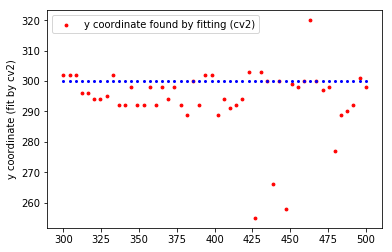

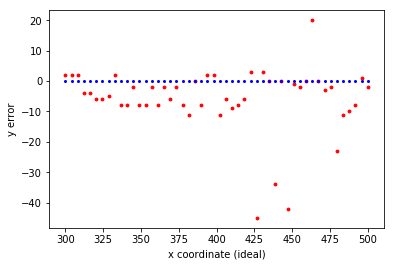

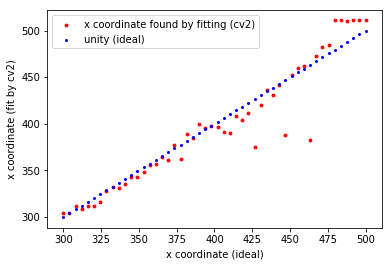

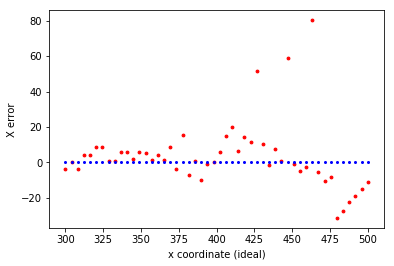

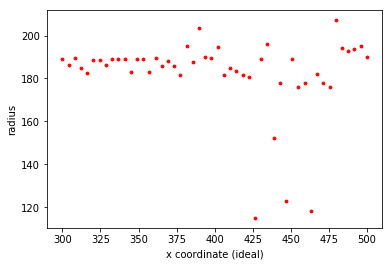

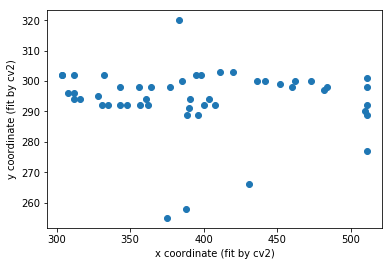

In [4]:
## test when part of the circle is out of image
x_levels=np.linspace(300,500,50)
x_fit=[]
y_fit=[]
r_fit=[]
for x_level in x_levels:
    
    point1=SimImg(512,int(x_level),300,0)
    point1.sim_z(25)
    circ=point1.find_circle()
    x_fit.append(circ[0])
    y_fit.append(circ[1])
    r_fit.append(circ[2])
    point1.show()
# 
print('y_fit: '+str(y_fit))
print('x_fit: '+str(x_fit))
print('r_fit: '+str(r_fit))



plt.scatter(x_levels,np.asarray(y_fit),8,c='r')
plt.scatter(x_levels,x_levels*0+300,4,c='b')
plt.legend(["y coordinate found by fitting (cv2)"])
plt.ylabel("y coordinate (fit by cv2)")
plt.show()
plt.scatter(x_levels,np.asarray(y_fit)-(x_levels*0+300),8,c='r')
plt.scatter(x_levels,x_levels*0,4,c='b')
plt.xlabel("x coordinate (ideal)")
plt.ylabel("y error")
plt.show()

plt.scatter(x_levels,np.asarray(x_fit),8,c='r')
plt.scatter(x_levels,x_levels,4,c='b')
plt.legend(["x coordinate found by fitting (cv2)", "unity (ideal)"])
plt.xlabel("x coordinate (ideal)")
plt.ylabel("x coordinate (fit by cv2)")
plt.show()
plt.scatter(x_levels,x_levels-np.asarray(x_fit),8,c='r')
plt.scatter(x_levels,x_levels*0,4,c='b')
plt.xlabel("x coordinate (ideal)")
plt.ylabel("X error")
plt.show()
plt.scatter(x_levels,np.asarray(r_fit),8,c='r')
plt.xlabel("x coordinate (ideal)")
plt.ylabel("radius")
plt.show()

plt.scatter(x_fit,y_fit)
plt.xlabel("x coordinate (fit by cv2)")
plt.ylabel("y coordinate (fit by cv2)")
plt.show()

In [2]:
## test fft / dct
from scipy import fftpack, ndimage
z_levels=np.linspace(0,15,3)
ffts=[]
dcts=[]
for z_level in z_levels:
    point1=SimImg(512,200,300,0)
    img=[]
    img=point1.sim_z(z_level)
    circ=point1.find_circle()
    x_fit.append(circ[0])
    y_fit.append(circ[1])
    r_fit.append(circ[2])
    point1.show()
    dct_img = fftpack.dct(img)
    dcts.append(np.max(abs(dct_img)))
    fig = plt.figure(figsize=(12,10))
    plt.imshow(normalize_img(abs(dct_img)))
    plt.show()
    fft2_img = fftpack.fft2(img)
    ffts.append(fft2_img)

plt.scatter(z_levels,dcts,label='dcts')
plt.show()

NameError: name 'x_fit' is not defined

krig_fit, z-level: -50.0
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.01 0.01]
pl: [2. 2.]
focus out of start range
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.01 0.01]
pl: [2. 2.]
focus out of start range
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.01 0.01]
pl: [2. 2.]
krig_fit, z-level: -44.73684210526316
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.01 0.01]
pl: [2. 2.]
focus out of start range
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.01 0.01]
pl: [2. 2.]
focus out of start range
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.01 0.01]
pl: [2. 2.]
krig_fit, z-level: -39.473684210526315
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.01 0.01]
pl: [2. 2.]
focus out of start range
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.00999748 0.0099974 ]
pl: [2. 2.]
krig_fit, z-level: -34.21052631578947
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: [0.00990606 0.00996895]
pl: [2. 2.]
focus out of start range
[1e-05, 1e-05, 2, 2]
[0.01, 0.01, 2, 2]
theta: 

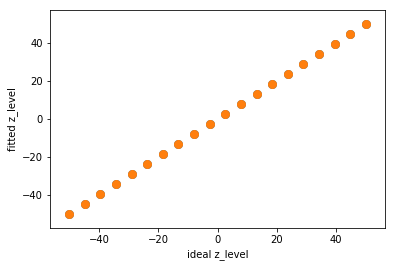

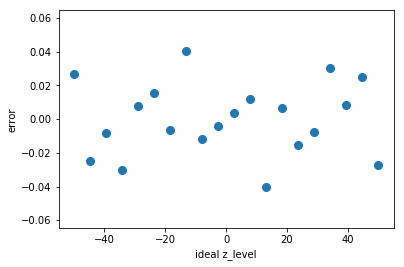

runtime 88.2739999294281


In [5]:
######################################################################################
######################################################################################
## auto-focus (searching) by two methods: binary search and quadratic, fitting and error
import time
start = time.time()
z_levels =np.linspace(-50,50,20)
fit_bin=[]
fit_quad=[]
fit_krig=[]
for z_level in z_levels:
    pt1=SimImg(512,200,300,z_level)
    getfocus_pt1=AutoFocus(pt1.sim_z, -15,15)
    print('krig_fit, z-level: '+str(z_level))
    fit_krig.append(getfocus_pt1.kriging_dct_focus(4))
#     print('bin_search, z-level: '+str(z_level))
#     fit_bin.append(getfocus_pt1.binary_search_focus(6))
#     print('quad_fit, z-level: '+str(z_level))
#     fit_quad.append(getfocus_pt1.quad_fitting_focus(4))

dot_size = 64
# plt.scatter(z_levels,np.asarray(fit_bin),dot_size)
# plt.scatter(z_levels,np.asarray(fit_quad),dot_size)
plt.scatter(z_levels,np.asarray(fit_krig),dot_size)
plt.scatter(z_levels,z_levels,dot_size)
# plt.legend(["z_level found by binary search", "z_level found by quadratic fitting","z_level found by kriging + DCT","ideal z_level (unity)"])
plt.xlabel("ideal z_level")
plt.ylabel("fitted z_level")
plt.show()
# plt.scatter(z_levels,z_levels-np.asarray(fit_bin),dot_size)
# plt.scatter(z_levels,z_levels-np.asarray(fit_quad),dot_size)
plt.scatter(z_levels,z_levels-np.asarray(fit_krig),dot_size)
# plt.legend(["error by binary search", "error by quadratic fitting", "error by kriging + DCT"])
plt.xlabel("ideal z_level")
plt.ylabel("error")
plt.show()
end = time.time()
print('runtime '+str(end - start))